# Intel Stock Price (INTC) Forecasting -- Naive Forecast

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)


In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE


In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
df = pd.read_csv('INTC.csv')
data = df.copy()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,41.632813,43.687500,41.625000,43.500000,25.214338,57710200
1,2000-01-04,42.718750,43.937500,41.125000,41.468750,24.036938,51019600
2,2000-01-05,41.500000,42.937500,40.250000,41.812500,24.236191,52389000
3,2000-01-06,40.875000,41.687500,39.093750,39.375000,22.823311,55171200
4,2000-01-07,38.750000,41.000000,38.687500,41.000000,23.765236,41096400
...,...,...,...,...,...,...,...
5885,2023-05-24,29.309999,29.490000,28.820000,29.000000,29.000000,28045800
5886,2023-05-25,28.290001,28.290001,26.860001,27.400000,27.400000,78009400
5887,2023-05-26,27.440001,29.090000,27.100000,29.000000,29.000000,71879700
5888,2023-05-30,29.700001,30.040001,29.000000,29.990000,29.990000,54874800


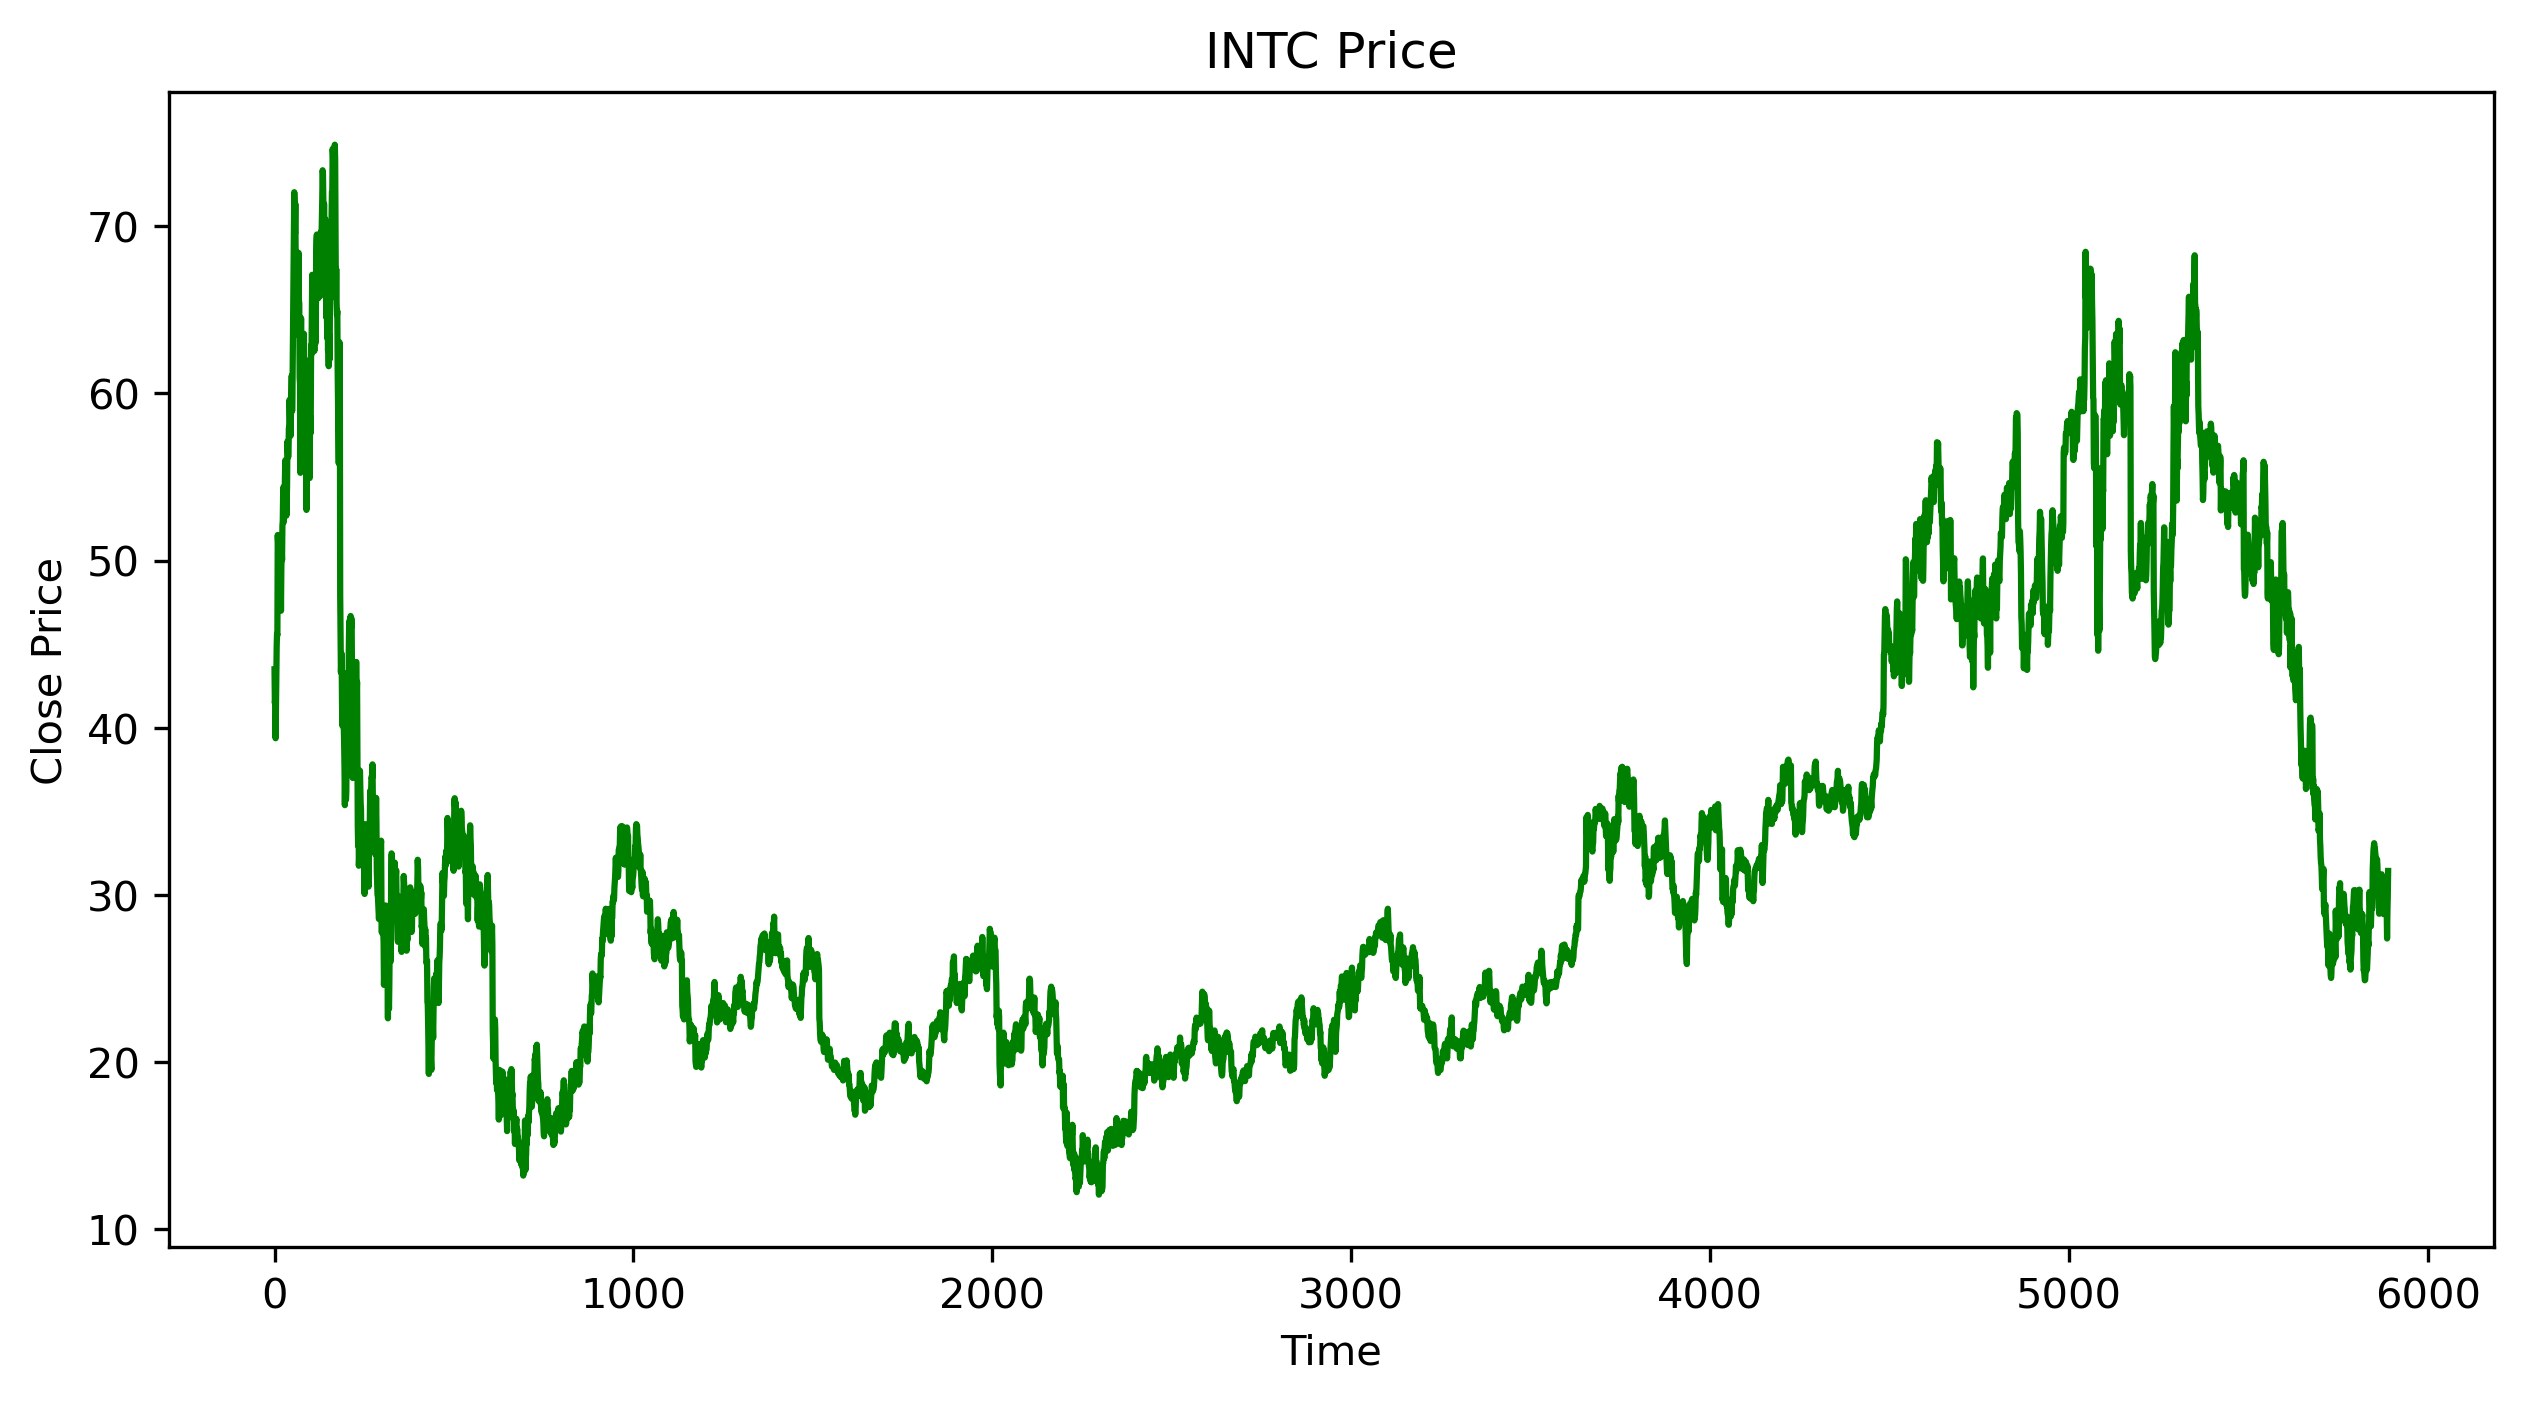

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('INTC Price')
plt.xlabel('Time')
plt.show()

In [ ]:
split = int(0.8 * data.shape[0])
Train, Test = data[0:split], data[split:]


X_train = Train[:-1].values
y_train = Train[1:].values

X_test = Test[:-1].values
y_test = Test[1:].values

X_train = np.reshape(X_train, (X_train.shape[0], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1))

y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))


In [ ]:
Test

4712    45.910000
4713    45.700001
4714    45.880001
4715    47.290001
4716    46.450001
          ...    
5885    29.000000
5886    27.400000
5887    29.000000
5888    29.990000
5889    31.440001
Name: Close, Length: 1178, dtype: float64

In [ ]:
predictions = []

# 遍歷測試集的每個時間步
for i in range(len(X_test)):
    # 取前一個時間步的值作為預測結果
    prediction = X_test[i-1]
    predictions.append(prediction)

predictions = X_test[:, 0]

In [ ]:
MAE=mean_absolute_error(y_test,predictions)
MSE=mean_squared_error(y_test,predictions,squared=True)
RMSE=mean_squared_error(y_test,predictions,squared=False)
MAPE=mean_absolute_percentage_error(y_test,predictions)
SMAPE=SMAPE_calulate(y_test,predictions)
RAE=RAE_calculate(y_test,predictions)
MRAE=MRAE_calculate(y_test,predictions)
MdRAE=MdRAE_calculate(y_test,predictions)
RSE=RSE_calculate(y_test,predictions,Root=False)
RRSE=RSE_calculate(y_test,predictions,Root=True)

print('MAE:',round(MAE,3)) # Mean Absolute Error 平均絕對誤差
print('MSE:',round(MSE,3)) # Mean Square Error 均方誤差
print('RMSE:',round(RMSE,3)) # Root Mean Squared Error 均方根誤差
print('MAPE:',round(MAPE*100,3),'%') # Mean Absolute Percentage Error 平均絕對百分誤差
print('SMAPE:',round(SMAPE,3),'%') # Symmetric Mean Absolute Percentage Error 對稱性平均絕對百分比誤差
print('RAE:',round(RAE,3)) # Relative Absolute Error 相對絕對誤差
print('MRAE:',MRAE) # Mean Relative Absolute Error
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value

print('RSE:',round(RSE,3)) # Relative Squared Error 相對平方誤差
print('RRSE:',round(RRSE,3))

MAE: 0.785
MSE: 1.444
RMSE: 1.202
MAPE: 1.663 %
SMAPE: 30300.66 %
RAE: 1674.994
MRAE: 1.4231046932917304
MdRAE: 1.314 bench: 48.168
RSE: 1.998
RRSE: 1.413


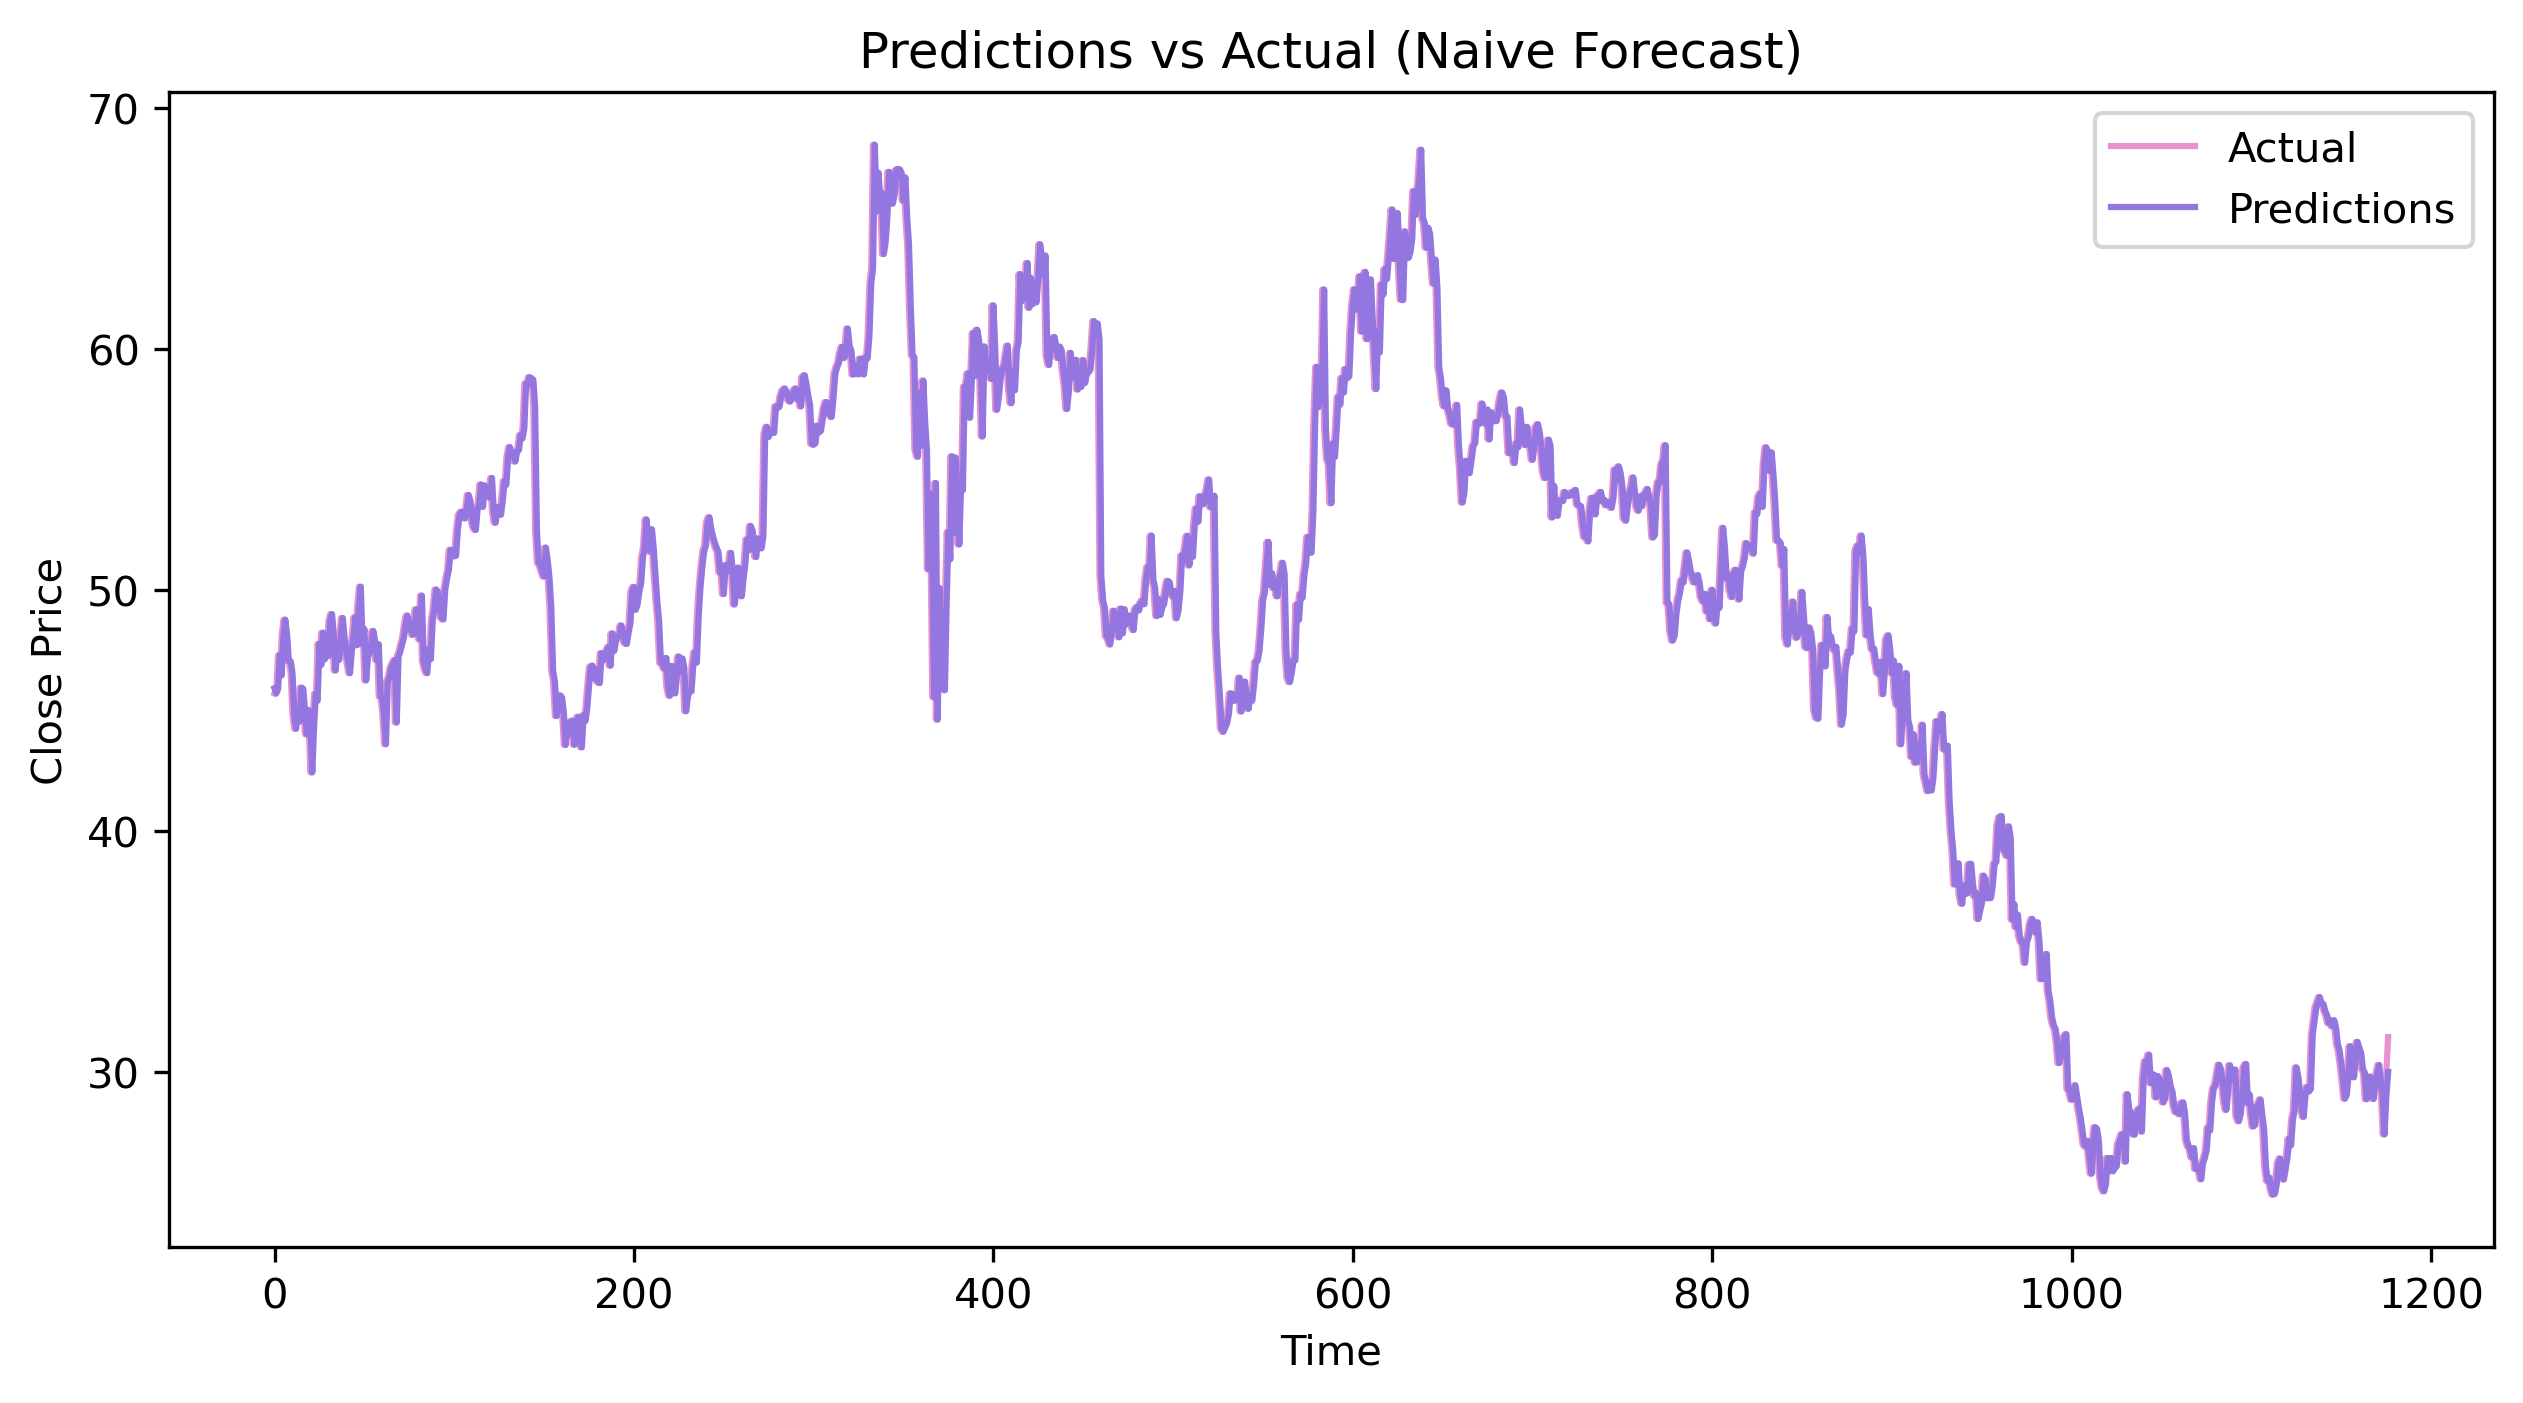

In [ ]:
predictions_f = predictions.flatten()
y_test_f = y_test.flatten()

timesteps = range(len(predictions))

plt.figure(figsize=(10,5),dpi=300)
plt.plot(timesteps, y_test_f, label='Actual', color = '#E893CF')
plt.plot(timesteps, predictions_f, label='Predictions', color = '#9376E0')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predictions vs Actual (Naive Forecast)')

plt.show()